In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
trip = pd.read_csv("./sf/trip.csv")
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [3]:
trip['time_of_day'] = pd.to_datetime(trip['start_date']).dt.hour

In [6]:
trip['day_of_week'] = pd.to_datetime(trip['start_date']).dt.weekday_name
trip.loc[trip.day_of_week == 'Saturday', 'day_of_week'] = 0
trip.loc[trip.day_of_week == 'Sunday', 'day_of_week'] = 0
trip.loc[trip.day_of_week == 'Monday', 'day_of_week'] = 1
trip.loc[trip.day_of_week == 'Tuesday', 'day_of_week'] = 1
trip.loc[trip.day_of_week == 'Wednesday', 'day_of_week'] = 1
trip.loc[trip.day_of_week == 'Thursday', 'day_of_week'] = 1
trip.loc[trip.day_of_week == 'Friday', 'day_of_week'] = 1

In [ ]:
trip = trip[trip.duration < 3600]

trip = trip[trip.duration > 300]

In [7]:
tripSubscribers = trip[trip.subscription_type == 'Subscriber']


tripSubscribers = tripSubscribers[['duration', 'time_of_day', 'day_of_week']]


tripSubscribers = tripSubscribers.groupby(by=['time_of_day', 'day_of_week'], as_index=False).mean()


tripSubscribers['duration'] = tripSubscribers['duration'] / 60


tripSubscribersWeekend = tripSubscribers[tripSubscribers.day_of_week == 0]

tripSubscribersWeekday = tripSubscribers[tripSubscribers.day_of_week == 1]

tripSubscribers.head()

,time_of_day,day_of_week,duration
0,0,0,9.779450
1,0,1,9.718004
2,1,0,9.586717
3,1,1,11.027160
4,2,0,14.662083


In [8]:
tripCustomers = trip[trip.subscription_type == 'Customer']


tripCustomers = tripCustomers[['duration', 'time_of_day', 'day_of_week']]


tripCustomers = tripCustomers.groupby(by=['time_of_day', 'day_of_week'], as_index=False).mean()


tripCustomers['duration'] = tripCustomers['duration'] / 60


tripCustomersWeekend = tripCustomers[tripCustomers.day_of_week == 0]

tripCustomersWeekday = tripCustomers[tripCustomers.day_of_week == 1]

tripCustomers.head()

,time_of_day,day_of_week,duration
0,0,0,78.874323
1,0,1,63.194205
2,1,0,104.852174
3,1,1,119.951724
4,2,0,112.866234


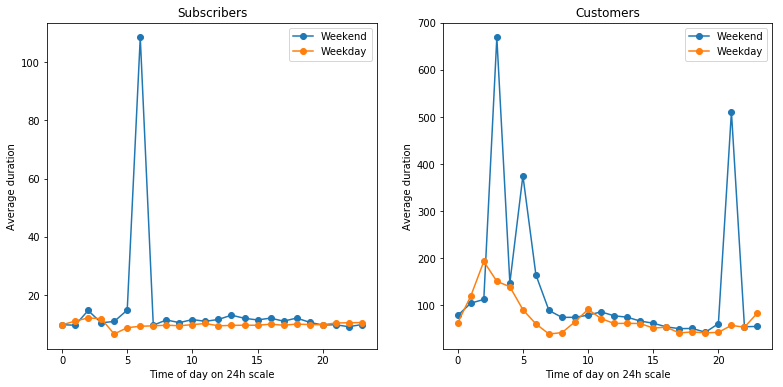

In [9]:
plt.figure(figsize=(13,6))


plt.subplot(121)
plt.plot(tripSubscribersWeekend.time_of_day, tripSubscribersWeekend.duration, marker='o')
plt.plot(tripSubscribersWeekday.time_of_day, tripSubscribersWeekday.duration, marker='o')
plt.legend(['Weekend', 'Weekday'])
plt.xlabel('Time of day on 24h scale')
plt.ylabel('Average duration')
plt.title('Subscribers')


plt.subplot(122)
plt.plot(tripCustomersWeekend.time_of_day, tripCustomersWeekend.duration, marker='o')
plt.plot(tripCustomersWeekday.time_of_day, tripCustomersWeekday.duration, marker='o')
plt.legend(['Weekend', 'Weekday'])
plt.xlabel('Time of day on 24h scale')
plt.ylabel('Average duration')
plt.title('Customers')

plt.show()

In [10]:
tripNo = trip


tripNo = tripNo[['id', 'time_of_day', 'day_of_week']]


tripNo = tripNo.groupby(by=['time_of_day', 'day_of_week'], as_index=False).count()


tripNoWeekend = tripNo[tripNo.day_of_week == 0]


tripNo.head()

,time_of_day,day_of_week,id
0,0,0,938
1,0,1,1233
2,1,0,606
3,1,1,583
4,2,0,354


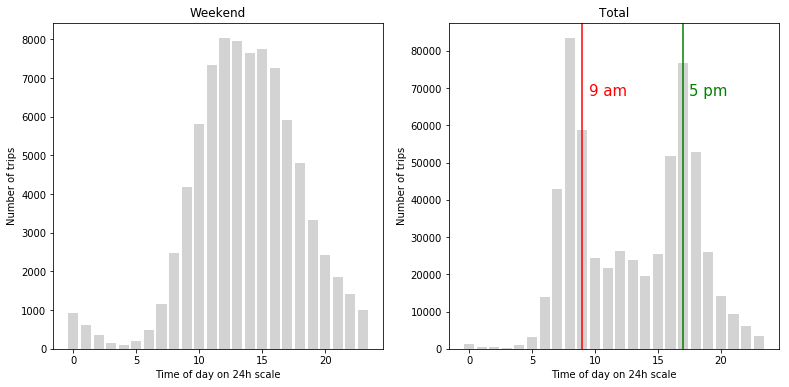

In [11]:
plt.figure(figsize=(13,6))

plt.subplot(121)
plt.bar(tripNoWeekend.time_of_day, tripNoWeekend.id, color='lightgray')
plt.title('Weekend')
plt.xlabel('Time of day on 24h scale')
plt.ylabel('Number of trips')


plt.subplot(122)
plt.bar(tripNo.time_of_day, tripNo.id, color='lightgray')
plt.axvline(x=9, color='red')
plt.axvline(x=17, color='green')
plt.annotate('9 am', xy=(9, 2), xytext=(9.5, 68000), color='red', size=15)
plt.annotate('5 pm', xy=(9, 2), xytext=(17.5, 68000), color='green', size=15)
plt.title('Total')
plt.xlabel('Time of day on 24h scale')
plt.ylabel('Number of trips')


plt.show()

In [12]:
station = pd.read_csv("./sf/station.csv")
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [13]:
tripCity = pd.merge(left=trip, right=station, how='left', left_on=['start_station_name'], right_on=['name'])

In [14]:
tripCity = tripCity[['duration', 'day_of_week', 'city']]
tripCity = tripCity.dropna(subset=['city'])

In [15]:
tripCity = tripCity.groupby(by=['day_of_week', 'city'], as_index=False).mean()

In [16]:
tripCity['duration'] = tripCity['duration'] / 60

In [17]:
tripCityWeekend = tripCity[tripCity.day_of_week == 0]

tripCityWeekday = tripCity[tripCity.day_of_week == 1]

In [18]:
tripCity

,day_of_week,city,duration
0,0,Mountain View,107.901240
1,0,Palo Alto,104.203162
2,0,Redwood City,77.255816
3,0,San Francisco,41.211420
4,0,San Jose,50.155132
5,1,Mountain View,20.519488
6,1,Palo Alto,59.663381
7,1,Redwood City,35.318311
8,1,San Francisco,13.743753
9,1,San Jose,18.003607


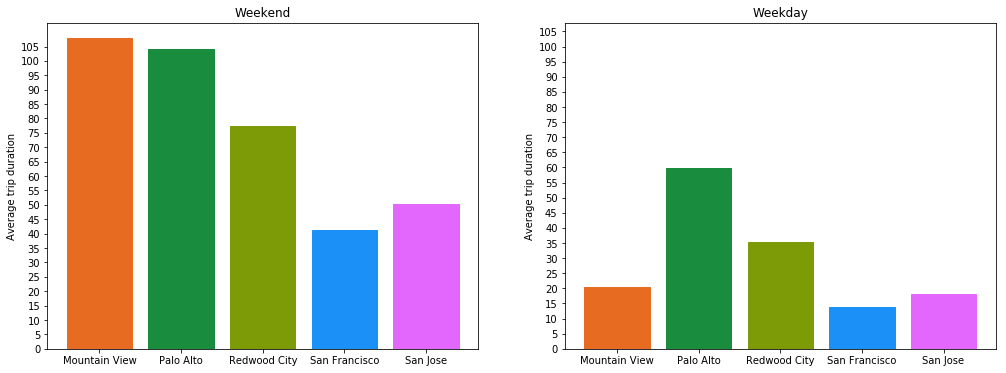

In [19]:
plt.figure(figsize=(17,6))

plt.subplot(121)
plt.yticks(np.arange(0, tripCityWeekend.duration.max(), 5))
bars = plt.bar(tripCityWeekend.city, tripCityWeekend.duration)
bars[0].set_color('#e86b22')
bars[1].set_color('#1a8c3e')
bars[2].set_color('#7d9b06')
bars[3].set_color('#1b90f7')
bars[4].set_color('#e367fc')
plt.title('Weekend')
plt.ylabel('Average trip duration')


plt.subplot(122)
plt.ylim([0, tripCityWeekend.duration.max()])
plt.yticks(np.arange(0, tripCityWeekend.duration.max(), 5))
bars1 = plt.bar(tripCityWeekday.city, tripCityWeekday.duration)
bars1[0].set_color('#e86b22')
bars1[1].set_color('#1a8c3e')
bars1[2].set_color('#7d9b06')
bars1[3].set_color('#1b90f7')
bars1[4].set_color('#e367fc')
plt.title('Weekday')
plt.ylabel('Average trip duration')


plt.show()